In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as trans

In [2]:
# Here we plot the results from the normalized average final collisions of all scenarios
data = pd.read_csv('normalized_average_collisions2.csv')
data.head()

,VehicleNumber,Adherence,normave,std
0,50,30,0.872,0.219308
1,50,60,0.540,0.060663
2,50,100,0.240,0.104307
3,100,30,1.140,0.160499
4,100,60,0.916,0.407608


In [10]:
# Group scenarios by vehicle number
veh50 = data[data['VehicleNumber']==50]

veh100 = data[data['VehicleNumber']==100]

veh200 = data[data['VehicleNumber']==200]

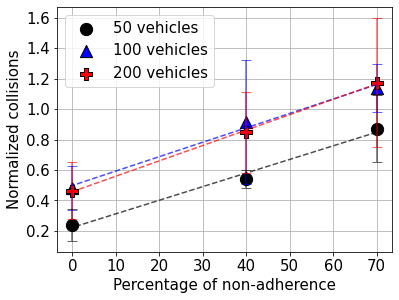

In [11]:
z50 = np.polyfit(100-veh50['Adherence'], veh50['normave'], 1)
p50 = np.poly1d(z50)

z100 = np.polyfit(100-veh100['Adherence'], veh100['normave'], 1)
p100 = np.poly1d(z100)

z200 = np.polyfit(100-veh200['Adherence'], veh200['normave'], 1)
p200 = np.poly1d(z200)

from matplotlib.legend_handler import HandlerTuple

fig, axs = plt.subplots(1, 1, figsize=(6.0, 4.5))
plt.rc('axes', axisbelow=True)
plt.grid()
fifty1 = plt.scatter(100-veh50['Adherence'], veh50['normave'], color='k', label='50 vehicles', marker='o', s=150.0, edgecolor='k')
fifty2 = plt.plot(100-veh50['Adherence'], p50(100-veh50['Adherence']), color='k', linestyle='--', alpha=0.7)

hundred1 = plt.scatter(100-veh100['Adherence'], veh100['normave'], color='b', label='100 vehicles', marker='^', s=150.0, edgecolor='k')
hundred2 = plt.plot(100-veh100['Adherence'], p100(100-veh100['Adherence']), color='b', linestyle='--', alpha=0.7)

thundred1 = plt.scatter(100-veh200['Adherence'], veh200['normave'], color='r', label='200 vehicles', marker='P', s=150.0, edgecolor='k')
thundred2 = plt.plot(100-veh200['Adherence'], p200(100-veh200['Adherence']), color='r', linestyle='--', alpha=0.7)
plt.legend(fontsize=15.0)


plt.errorbar(100-veh50['Adherence'], veh50['normave'], yerr=veh50['std'], linestyle='None', color='k', capsize=5.0, alpha=0.6, label='50 vehicles')
plt.errorbar(100-veh100['Adherence'], veh100['normave'], yerr=veh100['std'], linestyle='None', color='b', capsize=5.0, alpha=0.6, label='100 vehicles')
plt.errorbar(100-veh200['Adherence'], veh200['normave'], yerr=veh200['std'], linestyle='None', color='r', capsize=5.0, alpha=0.6, label='200 vehicles')


plt.ylabel('Normalized collisions', color='k', fontsize=15.0)
plt.xlabel('Percentage of non-adherence', color='k', fontsize=15.0)
plt.xticks(fontsize=15.0)
plt.yticks(fontsize=15.0)

plt.savefig('Collisions_vs_adherence.png', dpi=300)
plt.show()